# Auswertung der Seattle AirBNB-Daten von 2016


AirBNB hat viele seiner Daten veröffentlicht. Die in dieser Auswertung untersuchten Daten stammen von 
https://www.kaggle.com/datasets/airbnb/seattle/data
und sind in der public domain unter CC0 verfügbar.

Die Auswertung kann angesehen werden: 
* [mit Python-Code](index.html)
* [ohne Python-Code](seattle_airbnb.html)


## Inhaltsverzeichnis


1. [verwendete Bibilotheken](#verwendete-bibilotheken)
1. [Daten laden](#daten-laden)
1. [Erste Übersicht](#erste-übersicht)
    - [calendar](#calendar)
    - [listing](#listing)
1. [Daten vorverarbeiten](#daten-vorverarbeiten)
1. [Daten analysieren](#daten-analysieren)
1. [Ergebnisse visualisieren](#ergebnisse-visualisieren)


## verwendete Bibilotheken

In [ ]:
# Bibliotheken importieren

import pandas as pd  # Importieren von Pandas für die Datenanalyse
import numpy as np  # Importieren von NumPy für numerische Operationen
import matplotlib.pyplot as plt  # Importieren von Matplotlib für die Datenvisualisierung
import holidays # Importieren von holidays für Feiertage
import seaborn as sns # Importieren von seaborn für die Datenvisualisierung




# Daten laden
Laden Sie die Daten aus einer CSV-Datei oder einer anderen Datenquelle.

In [44]:
# Daten laden


calendar = pd.read_csv('./data/calendar.csv')
listings = pd.read_csv('./data/listings.csv')
reviews = pd.read_csv('./data/reviews.csv')

# Erste Übersicht

## calendar

/tmp/ipykernel_2572/3263434742.py:32: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  calendar.fillna({'is_day_before_holiday':True}, inplace=True)


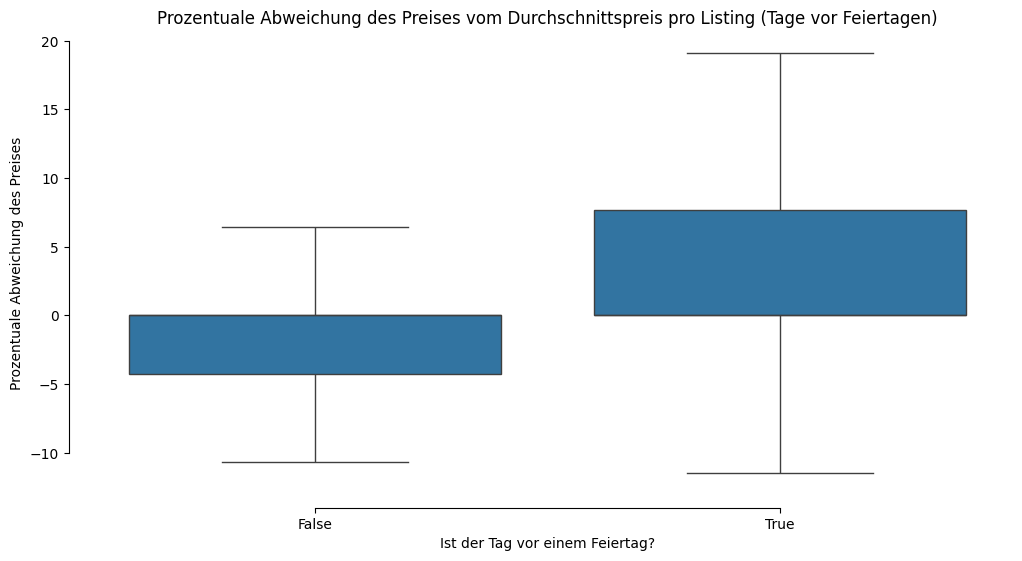

In [45]:




# aufbereiten der csv daten
calendar['_price'] = calendar['price'].replace('[\\$,]', '', regex=True).astype(float)
calendar['_date'] = pd.to_datetime(calendar['date'])
calendar['_available'] = calendar['available'].map({'t': True, 'f': False})

# Berechnen des Durchschnittspreises pro Listing (pandas ignoriert automatisch NaN-Werte)
average_price_per_listing = calendar.groupby('listing_id')['_price'].mean().reset_index()
average_price_per_listing.columns = ['listing_id', 'average_price']

# Zusammenführen der berechneten Durchschnittspreise mit dem ursprünglichen DataFrame
calendar = calendar.merge(average_price_per_listing, on='listing_id', how='left')

# Abweichung des Preises vom Durchschnittspreis pro listing berechnen
calendar['price_deviation'] = calendar['_price'] - calendar['average_price']

# prozentuale Abweichung des Preises vom Durchschnittspreis pro listing berechnen
calendar['price_deviation_percentage'] = calendar['price_deviation'] / calendar['average_price'] * 100

# Funktion zur Überprüfung, ob ein Datum ein Feiertag ist

us_holidays = holidays.US(state='WA')

def is_holiday(date):
    return date in us_holidays

# Spalte erstellen, die angibt, ob das Datum ein arbeitsfreier Tag ist
calendar['is_holiday_or_weekend'] = calendar['_date'].apply(lambda x: x.weekday() >= 5 or is_holiday(x))

# boolean Spalte erstellen, die angibt, ob das Datum direkt vor einem arbeitsfreien Tag liegt  
calendar['is_day_before_holiday'] = calendar['is_holiday_or_weekend'].shift(-1)
# NaN Werte in der letzten Zeile durch True ersetzen (1.1. ist ein Feiertag)
calendar.fillna({'is_day_before_holiday':True}, inplace=True)

# zwei candlestick-diagramme erstellen. prozentuale Abweichung des Preises vom Durchschnittspreis pro listing getrennt nach is_day_before_holiday.
plt.figure(figsize=(12, 6))
# außreißer ausblenden
sns.boxplot(x='is_day_before_holiday', y='price_deviation_percentage', data=calendar, showfliers=False)
sns.despine(offset=10, trim=True)
plt.title('Prozentuale Abweichung des Preises vom Durchschnittspreis pro Listing (Tage vor Feiertagen)')
plt.xlabel('Ist der Tag vor einem Feiertag?')
plt.ylabel('Prozentuale Abweichung des Preises')
plt.show()




## listing

In [ ]:
# Übersicht der Spalten und deren Daten für den DataFrame 'listings'
print("Übersicht für den DataFrame 'listings':")
print(listings.info())
print(listings.describe(include='all'))

# Visualisierung der Verteilung der 'price' Spalte im 'listings' DataFrame
listings['price'] = listings['price'].replace('[\\$,]', '', regex=True).astype(float)
listings['price'].hist(bins=50, figsize=(10, 6))
plt.title('Verteilung der Preise in den Listings')
plt.xlabel('Preis')
plt.ylabel('Häufigkeit')
plt.show()

# Daten vorverarbeiten
Bereinigen und transformieren Sie die Daten, um sie für die Analyse vorzubereiten.

In [ ]:
# Daten vorverarbeiten

# Überprüfen auf fehlende Werte
fehlende_werte = df.isnull().sum()
print("Fehlende Werte pro Spalte:\n", fehlende_werte)

# Entfernen von Zeilen mit fehlenden Werten
df = df.dropna()

# Entfernen von Duplikaten
df = df.drop_duplicates()

# Umwandeln von Datentypen (Beispiel: Umwandeln einer Spalte in den Datentyp 'datetime')
df['datumsspalte'] = pd.to_datetime(df['datumsspalte'])

# Skalieren von numerischen Daten (Beispiel: Normalisierung)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
numerische_spalten = ['spalte1', 'spalte2', 'spalte3']
df[numerische_spalten] = scaler.fit_transform(df[numerische_spalten])

# Anzeigen der ersten fünf Zeilen des bereinigten DataFrames
df.head()

# Daten analysieren
Führen Sie verschiedene Analysen auf den Daten durch, um Erkenntnisse zu gewinnen.

In [ ]:
# Daten analysieren

# Beschreibende Statistik der numerischen Spalten anzeigen
statistik = df.describe()
print("Beschreibende Statistik:\n", statistik)

# Korrelation zwischen den numerischen Spalten berechnen
korrelation = df.corr()
print("Korrelationsmatrix:\n", korrelation)

# Histogramme der numerischen Spalten erstellen
df[numerische_spalten].hist(bins=15, figsize=(15, 6), layout=(2, 3))
plt.tight_layout()
plt.show()

# Boxplots der numerischen Spalten erstellen
df[numerische_spalten].plot(kind='box', subplots=True, layout=(2, 3), figsize=(15, 6))
plt.tight_layout()
plt.show()

# Scatterplot-Matrix der numerischen Spalten erstellen
pd.plotting.scatter_matrix(df[numerische_spalten], figsize=(15, 10))
plt.show()

# Ergebnisse visualisieren
Visualisieren Sie die Ergebnisse der Analyse mit Diagrammen und Grafiken.

In [ ]:
# Ergebnisse visualisieren

# Balkendiagramm der durchschnittlichen Werte der numerischen Spalten
df[numerische_spalten].mean().plot(kind='bar', figsize=(10, 6))
plt.title('Durchschnittliche Werte der numerischen Spalten')
plt.xlabel('Spalten')
plt.ylabel('Durchschnittlicher Wert')
plt.show()

# Liniendiagramm der Zeitreihe (Beispiel: 'datumsspalte' vs. 'spalte1')
plt.figure(figsize=(10, 6))
plt.plot(df['datumsspalte'], df['spalte1'], marker='o')
plt.title('Zeitreihe von spalte1')
plt.xlabel('Datum')
plt.ylabel('Wert von spalte1')
plt.grid(True)
plt.show()

# Heatmap der Korrelationsmatrix
plt.figure(figsize=(10, 8))
sns.heatmap(korrelation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap der Korrelationsmatrix')
plt.show()

# Kreisdiagramm der Verteilung einer kategorialen Spalte (Beispiel: 'kategoriespalte')
df['kategoriespalte'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8))
plt.title('Verteilung der kategoriespalte')
plt.ylabel('')
plt.show()